In [46]:
import os
print(os.getcwd())

/content


Import relevant librairies

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Selection location of file on your path

---



In [48]:
file_path = "/content/drive/Shareddrives/1_EQUIPE/3_FORMATIONS/COURS_ML_Erwan/CWRM_Vegetation_dataset/CWRM_GLFEI_vegetation_dataset_v2_extracted_landscape.csv"

In [49]:
df = pd.read_csv(file_path, nrows=5000, delimiter=";")
df.head()

,SAMPLE_ID,PT_ID,SITE_ID,TILE_ID,LON,LAT,XVAL,YVAL,ZVAL_1m,ZVAL,...,Non-Calcar,Coarse,Fine,Class_Land,Land_mask,HGM_BL,HGM_LOE,HGM_LPP,HGM_RRB,HGM_RRO
0,27552,238582335,5374.0,238,-76.450476,44.276259,384253.723422,4.903583e+06,75.82008,75.541,...,NaN,NaN,NaN,Tree cover,False,False,False,False,False,True
1,32450,238582335,5374.0,238,-76.450476,44.276259,384247.201832,4.903576e+06,75.41211,75.541,...,NaN,NaN,NaN,Tree cover,False,False,False,False,False,True
2,27522,238583332,5374.0,238,-76.450854,44.276344,384216.275492,4.903587e+06,75.04985,74.825,...,NaN,NaN,NaN,Tree cover,False,False,False,False,False,True
3,27523,238583333,5374.0,238,-76.450729,44.276346,384226.649723,4.903587e+06,75.25931,75.029,...,NaN,NaN,NaN,Tree cover,False,False,False,False,False,True
4,27524,238583333,5374.0,238,-76.450729,44.276346,384226.630084,4.903586e+06,75.42680,75.029,...,NaN,NaN,NaN,Tree cover,False,False,False,False,False,True


In [50]:
df.columns

Index(['SAMPLE_ID', 'PT_ID', 'SITE_ID', 'TILE_ID', 'LON', 'LAT', 'XVAL',
       'YVAL', 'ZVAL_1m', 'ZVAL', 'YEAR', 'SOURCE', 'SOURCE_TYPE', 'SAV', 'EM',
       'WM', 'SW', 'UPL', 'DOMINANCE', 'CLASSIF', 'UTM', 'SLOPE_10m',
       'CURVATURE_10m', 'SLOPE_30m_resampled', 'CURVATURE_30m_resampled',
       'SLOPE_130m_resampled', 'CURVATURE_130m_resampled',
       'SLOPE_250m_resampled', 'CURVATURE_250m_resampled',
       'SLOPE_310m_resampled', 'CURVATURE_310m_resampled', 'hMin_SC1',
       'hMoy_SC1', 'hMax_SC1', 'Flood_SC1', 'pcFMoy_SC1', 'pcDMoy_SC1',
       'pcFluxMoy_SC1', 'saPxMax_SC1', 'saPMoy_SC1', 'TcMin_SC1', 'TcMax_SC1',
       'TcMoy_SC1', 'xTcMax_SC1', 'xTqMax_SC1', 'hMin_PSC2', 'hMoy_PSC2',
       'hMax_PSC2', 'Flood_PSC2', 'pcFMoy_PSC2', 'pcDMoy_PSC2',
       'pcFluxMoy_PSC2', 'saPxMax_PSC2', 'saPMoy_PSC2', 'TcMin_PSC2',
       'TcMax_PSC2', 'TcMoy_PSC2', 'xTcMax_PSC2', 'xTqMax_PSC2', 'hMin_PSC3',
       'hMoy_PSC3', 'hMax_PSC3', 'Flood_PSC3', 'pcFMoy_PSC3', 'pcDMoy_PSC3',


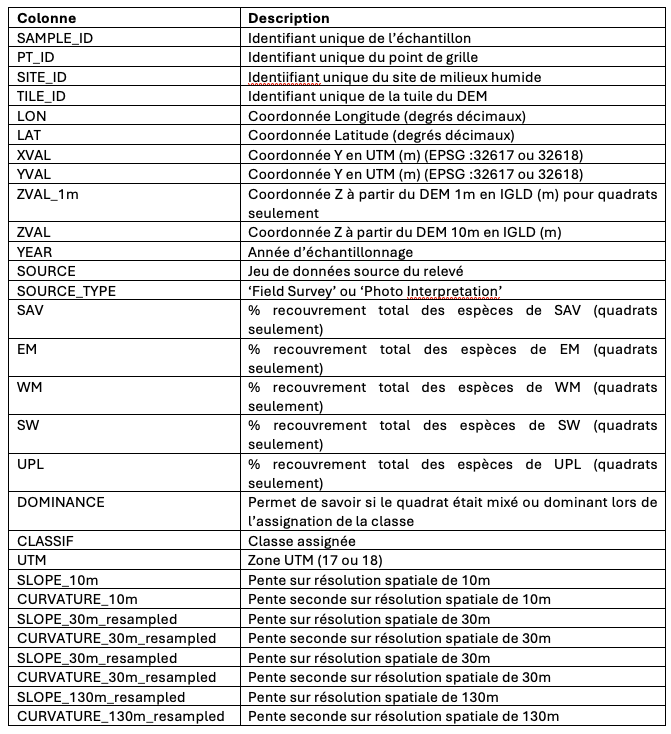

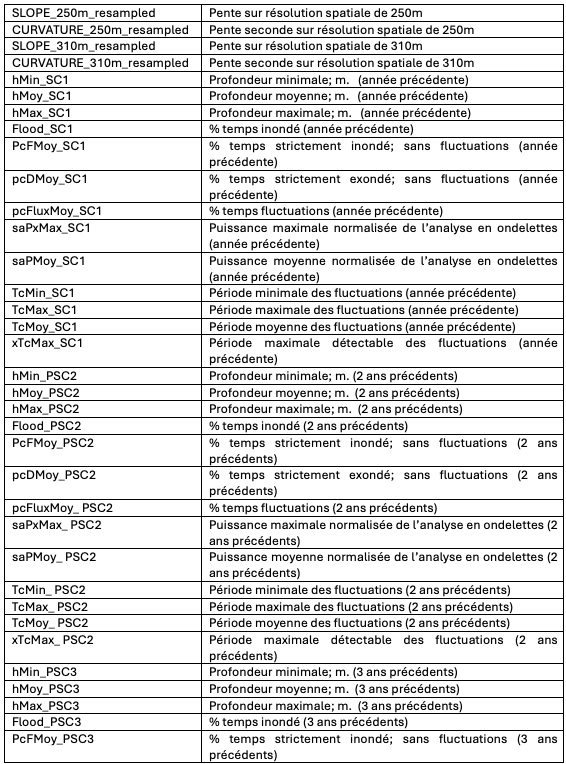
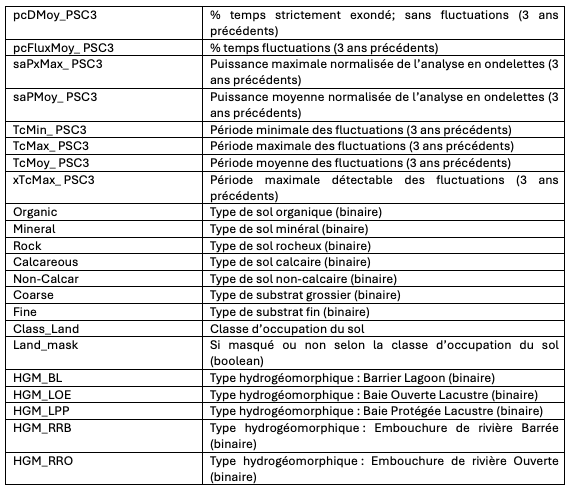

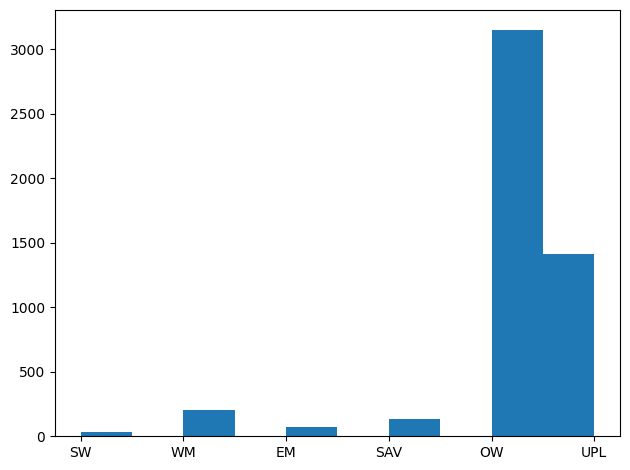

In [51]:
plt.hist(df.CLASSIF)
plt.tight_layout()

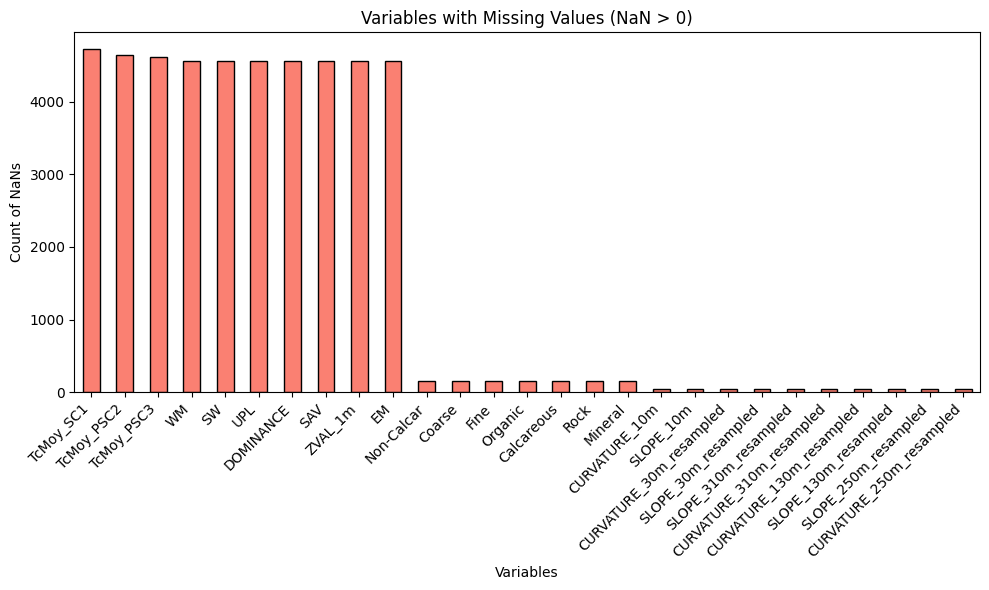

In [52]:
# 1. Quantify NaNs
nan_counts = df.isna().sum()

# 2. Filter to only include variables with more than 0 NaNs
nan_counts_filtered = nan_counts[nan_counts > 0].sort_values(ascending=False)

# 3. Create the bar chart for filtered results
plt.figure(figsize=(10, 6))
nan_counts_filtered.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Variables with Missing Values (NaN > 0)')
plt.xlabel('Variables')
plt.ylabel('Count of NaNs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [53]:
# 1. Calculate the percentage of NaNs for each column
nan_percentage = df.isna().mean()

# 2. Identify columns where the percentage is greater than 30% (0.3)
threshold = 0.3
cols_to_drop = nan_percentage[nan_percentage > threshold].index.tolist()

# 3. Drop those columns
df_cleaned = df.drop(columns=cols_to_drop)

print(f"Dropped columns: {cols_to_drop}")

Dropped columns: ['ZVAL_1m', 'SAV', 'EM', 'WM', 'SW', 'UPL', 'DOMINANCE', 'TcMoy_SC1', 'TcMoy_PSC2', 'TcMoy_PSC3']


In [54]:
df_cleaned.columns

Index(['SAMPLE_ID', 'PT_ID', 'SITE_ID', 'TILE_ID', 'LON', 'LAT', 'XVAL',
       'YVAL', 'ZVAL', 'YEAR', 'SOURCE', 'SOURCE_TYPE', 'CLASSIF', 'UTM',
       'SLOPE_10m', 'CURVATURE_10m', 'SLOPE_30m_resampled',
       'CURVATURE_30m_resampled', 'SLOPE_130m_resampled',
       'CURVATURE_130m_resampled', 'SLOPE_250m_resampled',
       'CURVATURE_250m_resampled', 'SLOPE_310m_resampled',
       'CURVATURE_310m_resampled', 'hMin_SC1', 'hMoy_SC1', 'hMax_SC1',
       'Flood_SC1', 'pcFMoy_SC1', 'pcDMoy_SC1', 'pcFluxMoy_SC1', 'saPxMax_SC1',
       'saPMoy_SC1', 'TcMin_SC1', 'TcMax_SC1', 'xTcMax_SC1', 'xTqMax_SC1',
       'hMin_PSC2', 'hMoy_PSC2', 'hMax_PSC2', 'Flood_PSC2', 'pcFMoy_PSC2',
       'pcDMoy_PSC2', 'pcFluxMoy_PSC2', 'saPxMax_PSC2', 'saPMoy_PSC2',
       'TcMin_PSC2', 'TcMax_PSC2', 'xTcMax_PSC2', 'xTqMax_PSC2', 'hMin_PSC3',
       'hMoy_PSC3', 'hMax_PSC3', 'Flood_PSC3', 'pcFMoy_PSC3', 'pcDMoy_PSC3',
       'pcFluxMoy_PSC3', 'saPxMax_PSC3', 'saPMoy_PSC3', 'TcMin_PSC3',
       'TcMax_PSC3',

In [55]:
len(df_cleaned.columns)

77

In [56]:
# Drop columns that could bias the prediction (ex: sample location, unique ID) and the target 'ClASSIF' to build the features
cols_to_drop = ['SAMPLE_ID', 'PT_ID', 'SITE_ID', 'TILE_ID', 'LON', 'LAT', 'XVAL',
       'YVAL', 'ZVAL', 'YEAR', 'SOURCE', 'SOURCE_TYPE', 'CLASSIF', 'UTM']
# 3. Drop those columns
df_features = df_cleaned.drop(columns=cols_to_drop)

print(f"Dropped columns: {cols_to_drop}")

Dropped columns: ['SAMPLE_ID', 'PT_ID', 'SITE_ID', 'TILE_ID', 'LON', 'LAT', 'XVAL', 'YVAL', 'ZVAL', 'YEAR', 'SOURCE', 'SOURCE_TYPE', 'CLASSIF', 'UTM']


Let's start with a model using KNN (K Nearest neighbours). The use of categorical variables with this model is dangerous. Let's remove for now.

In [57]:
cat_cols = ['Organic', 'Mineral','Rock', 'Calcareous', 'Non-Calcar', 'Coarse', 'Fine', 'Class_Land', 'Land_mask', 'HGM_BL', 'HGM_LOE', 'HGM_LPP', 'HGM_RRB', 'HGM_RRO']
df_features_num = df_features.drop(columns=cat_cols)

In [58]:
#Either drop the rows with NAN remaining or Impute missing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_features_num.values)
imputed_data = imputer.transform(df_features_num.values)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Normalisation des données
ss = StandardScaler()


# On cherche à classer la variable 'CLASSIF'
y = df['CLASSIF'].values
X = imputed_data
# Division : 70% train, 30% test
# stratify=y assure que la proportion des classes est conservée dans les deux sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

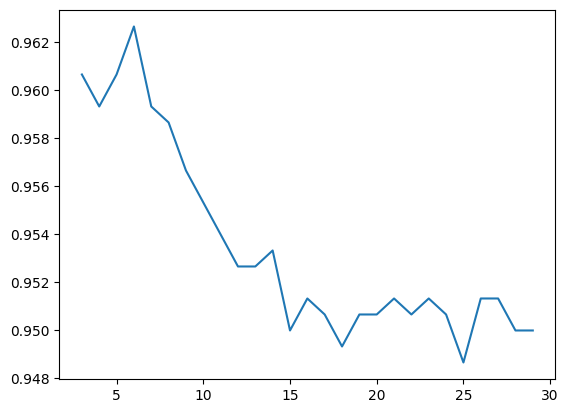

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

neighbours = np.arange(3, 30)
scores = []
for n in neighbours:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(ss.fit_transform(X_train), y_train)
  y_pred = knn.predict(ss.transform(X_test))
  scores.append(accuracy_score(y_test, y_pred, normalize = True))

plt.plot(neighbours, scores)

Let's go with another algorithm - Random Forest and use categorical variables

In [74]:
# To use imputing and scaling we need to process numerical and categorical differently

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# 2. Define which columns are continuous variables and categorical ones
num_cols = list(df_features_num.columns)

# 3. Create the ColumnTransformer
# We map specific transformers to specific column names
preprocessor = ColumnTransformer(
    transformers=[
        # (name, transformer, columns_to_apply_to)
        ('num_imputer', SimpleImputer(strategy='mean'), num_cols),
        ('cat_imputer', OrdinalEncoder(), cat_cols)
    ],
    # 'passthrough' keeps columns not mentioned; 'drop' (default) removes them
    remainder='passthrough'
)

# 4. Apply the transformation
# The result is a NumPy array
df_imputed_array = preprocessor.fit_transform(df_features)

In [75]:

scaler = ColumnTransformer(
    transformers=[
        # (name, transformer, columns_to_apply_to)
        ('num_imputer', StandardScaler(), num_cols),
    ],
    # 'passthrough' keeps columns not mentioned; 'drop' (default) removes them
    remainder='passthrough'
)


In [76]:
# On cherche à classer la variable 'CLASSIF' encore
y = df['CLASSIF'].values
X = df_imputed_array
# Division : 70% train, 30% test
# stratify=y assure que la proportion des classes est conservée dans les deux sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

X_train_std = scaler.fit_transform(pd.DataFrame(X_train, columns=num_cols + cat_cols))
X_test_std = scaler.transform(pd.DataFrame(X_test, columns=num_cols + cat_cols))

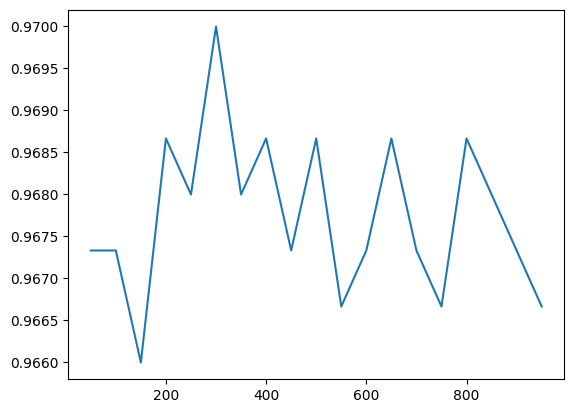

In [79]:
from sklearn.ensemble import RandomForestClassifier

estimators = np.arange(50, 1000, 50)
scores = []
for n in estimators:
  clf = RandomForestClassifier(n_estimators=n)
  clf.fit(X_train_std, y_train)
  y_pred = clf.predict(X_test_std)
  scores.append(accuracy_score(y_test, y_pred, normalize = True))
plt.plot(estimators, scores)